<a href="https://colab.research.google.com/github/rajivsresearch/SP500/blob/master/SP500_Return_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S&P 500 Return Simulation

This notebook will simulate the returns from S&P 500 for an investment made in 5 installments between a start and end date and the date when the return is calculated. 
For instance what is the distribution of retuns if the investments were made randomly in 5 installments between Jan. 1, 2017 and Dec. 31, 2017, on June 1, 2018?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


My SP500 data is in 3 datasets that I downloaded from various sources including Yahoo Finance.

In [0]:
sp1 = pd.read_csv('drive/My Drive/Data/SP5001.csv')
sp2 = pd.read_csv('drive/My Drive/Data/SP5002.csv')
sp3 = pd.read_csv('drive/My Drive/Data/SP5003.csv')

Concatenate the 3 dataframes to a single dataframe

In [0]:
sp = pd.concat([sp1, sp2, sp3])

We are concerned with the Date and the Adjusted Close, all other columns can be dropped

In [0]:
sp = sp.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

Convert Date to Datetime

In [0]:
sp['Date'] = pd.to_datetime(sp['Date'])

Sort the dataframe by Date

In [0]:
sp = sp.sort_values(by='Date').reset_index(drop=True)

Inspect the results of the various transformations

In [10]:
sp.head()

,Date,Adj Close
0,2017-03-24,2343.979980
1,2017-03-23,2345.959961
2,2017-03-22,2348.449951
3,2017-03-21,2344.020020
4,2017-03-20,2373.469971


In [17]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15429 entries, 0 to 15428
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15429 non-null  datetime64[ns]
 1   Adj Close  15429 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 241.2 KB


This function will get a sample of 5 rows from the S&P 500 dataframe 

In [0]:
def get_data(start, end):
  return sp.loc[((sp['Date'] >= start) & (sp['Date'] >= start)), 'Adj Close'].sample(5)

This function will get the number of units that can be purchased with a hypothetical amount. It uses the previous function to get 5 random values of SP 500 and then calculates the number of units that can be purchased on those dates.

In [0]:
def get_units(start, end):
  data = get_data(start, end)
  return 2000/data.sum()

For instance, the number of units that can be purchased with the hypothetical amount in the example below is 0.15

In [38]:
get_units('2017-01-01', '2017-12-31')

0.15361466733096232

Now that we know the number of units that can be purchased on 5 dates within a period, this function will get the return for those purchases on a future date

In [0]:
def get_return(num_units, return_date):
  return sp.loc[sp['Date'] == return_date, 'Adj Close']*num_units/100

The last date that we have values for in our dataframe

In [48]:
sp.tail(1)['Date'].values[0]

numpy.datetime64('2018-06-15T00:00:00.000000000')

Get me the return for my 5 purchases in 2017 as of 15 June, 2018

In [58]:
get_return(get_units('2017-01-01', '2017-12-31'), '2018-06-15')

15428    4.239858
Name: Adj Close, dtype: float64

Now simulate the returns over 100 trials

In [0]:
returns = np.zeros(100)
for i in np.arange(0,100):
  returns[i] = get_return(get_units('2017-01-01', '2017-12-31'), '2018-06-15')

Plot the histogram of returns

(array([ 4.,  4., 13., 12., 23., 21.,  9.,  7.,  4.,  3.]),
 array([4.12815991, 4.18448787, 4.24081583, 4.2971438 , 4.35347176,
        4.40979972, 4.46612768, 4.52245564, 4.5787836 , 4.63511156,
        4.69143952]),
 <a list of 10 Patch objects>)

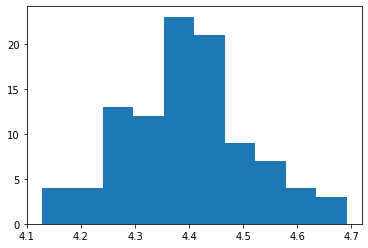

In [57]:
plt.hist(returns)

What this tells us is that if we made investments in 2017, then by June 2018, then the distribution of retunrs will look like the figure above. The median is around 4.4% or so.